# Walmart Sales Analysis and Prediction
Team 6

## Introduction

In this Jupyter Notebook, we will perform an analysis of Walmart sales data for 45 stores between the period of 2010-02-05 to 2012-10-26. The dataset includes various features such as store information, department details, economic indicators like CPI and unemployment rate, weather information, promotional markdowns, fuel prices, and more. The main objective is to predict the weekly sales based on these features.

##### Features:
* **Store**: Store number.
* **Date**: Day of the week.
* **Temperature**: Average temperature in the region in Fahrenheit.
* **Fuel_Price**: Cost of fuel in the region in Dollars.
* **MarkDown1**: Anonymized data related to promotional markdowns that Walmart is running.
* **MarkDown2**: Anonymized data related to promotional markdowns that Walmart is running.
* **MarkDown3**: Anonymized data related to promotional markdowns that Walmart is running.
* **MarkDown4**: Anonymized data related to promotional markdowns that Walmart is running.
* **MarkDown5**: Anonymized data related to promotional markdowns that Walmart is running.
* **CPI**: The consumer price index.
* **Unemployment**: The unemployment rate.
* **IsHoliday**:Whether the week is a special holiday week.

##### Stores:
* **Store**: Stores numbers from 1 to 45.
* **Type**: Store type has been provided, there are 3 types A, B, and C.
* **Size**: Stores size.

##### Train:
* **Store**: The store number. 
* **Dept**: The department number. 
* **Date**: Day of the week.
* **Weekly_Sales**: Sales for the given department in the given store in Dollars.
* **IsHoliday**: Whether the week is a special holiday week.

## Data Wrangling

### Data Gathering

The datasets are provided as CSV files.

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
features = pd.read_csv('features.csv')
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [3]:
stores=pd.read_csv('stores.csv')
stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [4]:
train= pd.read_csv('train.csv')
train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


### Data Assessing



In [5]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
features.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [7]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [8]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [9]:
train.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False
421569,45,98,2012-10-26,1076.80,False


In [10]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [11]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [13]:
features.describe(include='all')

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
count,8190.000000,8190,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000,8190
unique,NaN,182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,2010-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7605
mean,23.000000,NaN,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821,NaN
std,12.987966,NaN,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259,NaN
min,1.000000,NaN,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000,NaN
25%,12.000000,NaN,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000,NaN
50%,23.000000,NaN,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000,NaN
75%,34.000000,NaN,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000,NaN


In [14]:
stores.describe(include='all')

,Store,Type,Size
count,45.000000,45,45.000000
unique,NaN,3,NaN
top,NaN,A,NaN
freq,NaN,22,NaN
mean,23.000000,NaN,130287.600000
std,13.133926,NaN,63825.271991
min,1.000000,NaN,34875.000000
25%,12.000000,NaN,70713.000000
50%,23.000000,NaN,126512.000000
75%,34.000000,NaN,202307.000000


In [15]:
train.describe(include='all')

,Store,Dept,Date,Weekly_Sales,IsHoliday
count,421570.000000,421570.000000,421570,421570.000000,421570
unique,NaN,NaN,143,NaN,2
top,NaN,NaN,2011-12-23,NaN,False
freq,NaN,NaN,3027,NaN,391909
mean,22.200546,44.260317,NaN,15981.258123,NaN
std,12.785297,30.492054,NaN,22711.183519,NaN
min,1.000000,1.000000,NaN,-4988.940000,NaN
25%,11.000000,18.000000,NaN,2079.650000,NaN
50%,22.000000,37.000000,NaN,7612.030000,NaN
75%,33.000000,74.000000,NaN,20205.852500,NaN


In [16]:
# Counting the number of holiday days.
features.IsHoliday.value_counts()

False    7605
True      585
Name: IsHoliday, dtype: int64

In [17]:
# Range of dates in features dataset.
features.Date.min(),features.Date.max()

('2010-02-05', '2013-07-26')

In [18]:
# Counting The number of each store type.
stores.Type.value_counts()

A    22
B    17
C     6
Name: Type, dtype: int64

In [19]:
# Range of dates in train dataset.
train.Date.min(),train.Date.max()

('2010-02-05', '2012-10-26')

In [20]:
# We have 1285 rows from Weakly_Sales that are less than zero.
train[train.Weekly_Sales<0].shape

(1285, 5)

In [21]:
def count_outliers(df,column):
    """
    Count the number of outliers in a specific column of a DataFrame using the IQR method.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    column (str): The name of the column to analyze.

    Returns:
    str: A message indicating the number of outliers found in the specified column.
    """
    q1= df[column].quantile(0.25)
    q3= df[column].quantile(0.75)
    iqr= q3-q1
    lower= q1-1.5*iqr
    higher= q3+1.5*iqr
    df_outlier= df[(df[column]< lower) | (df[column]> higher)]
    outlier_count= f'The number of outliers of the column {column} is {df_outlier.shape[0]} '
    return outlier_count
    

In [22]:
print(count_outliers(train,'Weekly_Sales'))

The number of outliers of the column Weekly_Sales is 35521 


In [23]:
print(count_outliers(features,'MarkDown1'))

The number of outliers of the column MarkDown1 is 237 


In [24]:
print(count_outliers(features,'MarkDown2'))

The number of outliers of the column MarkDown2 is 436 


In [25]:
print(count_outliers(features,'MarkDown3'))

The number of outliers of the column MarkDown3 is 480 


In [26]:
print(count_outliers(features,'MarkDown4'))

The number of outliers of the column MarkDown4 is 337 


In [27]:
print(count_outliers(features,'MarkDown5'))

The number of outliers of the column MarkDown5 is 212 


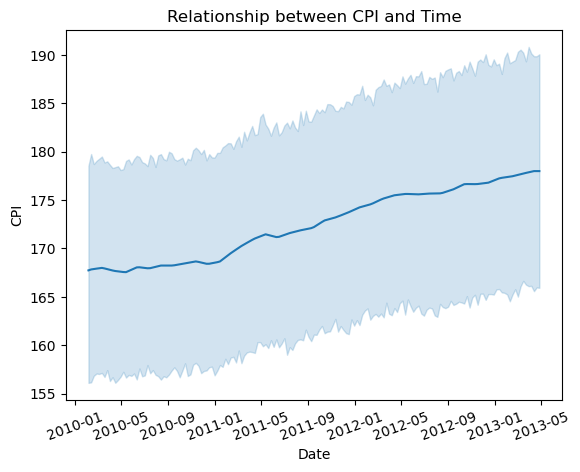

In [28]:
# Relationship between CPI and Time
sns.lineplot(data=features,x=pd.to_datetime(features['Date']),y='CPI')
plt.xticks(rotation=20);
plt.title('Relationship between CPI and Time');

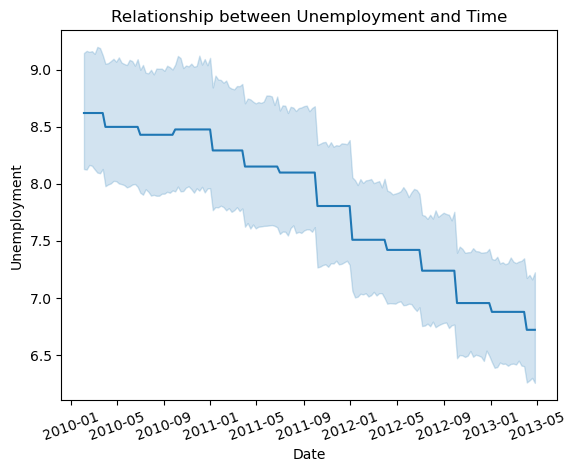

In [29]:
sns.lineplot(data=features,x=pd.to_datetime(features['Date']),y='Unemployment')
plt.xticks(rotation=20);
plt.title('Relationship between Unemployment and Time');

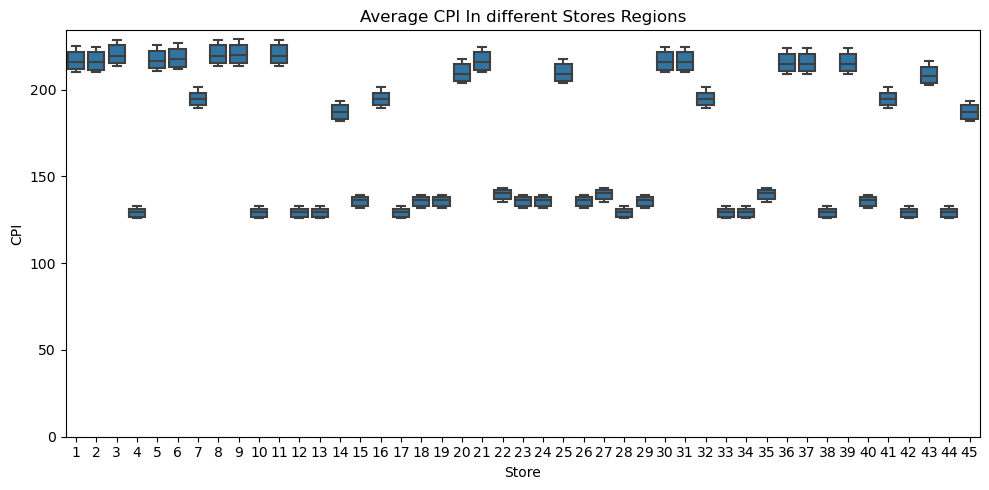

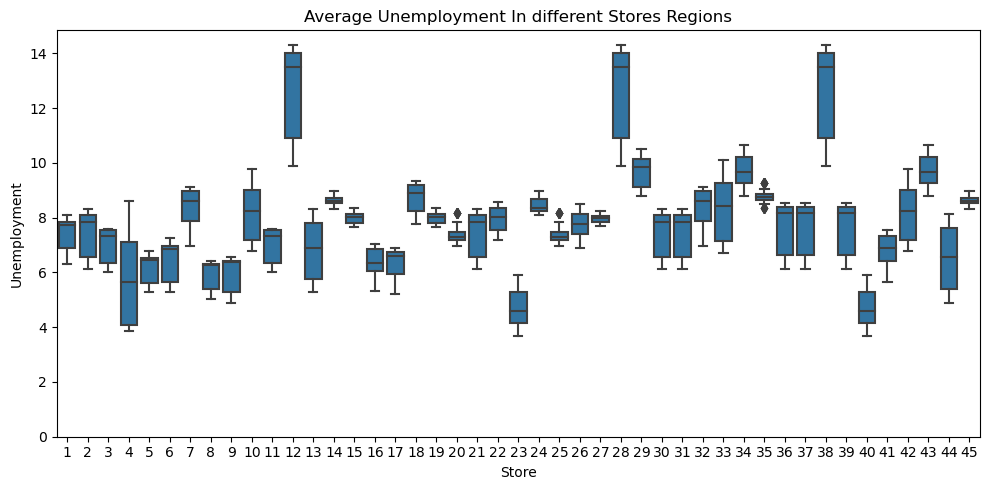

In [30]:
def plot_data(label):
    color=sns.color_palette()[0]
    plt.figure(figsize=(10,5))
    sns.boxplot(features,x = 'Store', y = label,color= color)
    plt.title(f'Average {label} In different Stores Regions')
    plt.ylim(bottom=0) 
    plt.tight_layout()
    
plot_data('CPI')
plot_data('Unemployment')

In [31]:
features[features['MarkDown1']<0].shape

(4, 12)

In [32]:
features[features['MarkDown2']<0].shape

(25, 12)

In [33]:
features[features['MarkDown3']<0].shape

(13, 12)

In [34]:
features[features['MarkDown4']<0].shape

(0, 12)

In [35]:
features[features['MarkDown5']<0].shape

(2, 12)

In [36]:
def negative_test(value):
    """
    Classify a numerical value as 'Negative' if it's less than 0, otherwise 'Positive'.

    Parameters:
    value (float or int): The numerical value to be classified.

    Returns:
    str: The classification label ('Negative' or 'Positive').
    """
    if value < 0:
        return 'Negative'
    else:
        return 'Positive'

def show_ngtve(data):
    """
    Visualize the distribution of positive and negative values in a dataset.

    This function creates a countplot showing the number of 'Positive' and 'Negative'
    classifications based on the values in the first column of the input DataFrame.

    Parameters:
    data (pandas.DataFrame): The DataFrame containing the data to be analyzed.

    Returns:
    None
        Displays the countplot using Matplotlib and Seaborn.
    """
    df=data.copy()
    df['Status'] = df.iloc[:,0].apply(lambda x:negative_test(x))
    plt.figure(figsize=(6,4))
    ax = sns.countplot(df,x = df['Status'], color= 'c',width=0.3)
    
    total = len(df)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height() + 5000
        ax.annotate(percentage, (x, y), ha='center')
   
    plt.tight_layout()




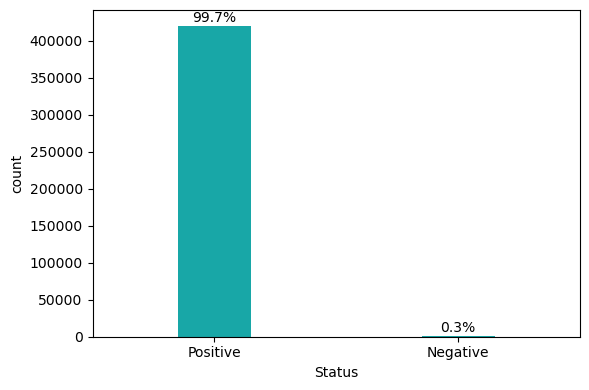

In [37]:
show_ngtve(train[['Weekly_Sales']])

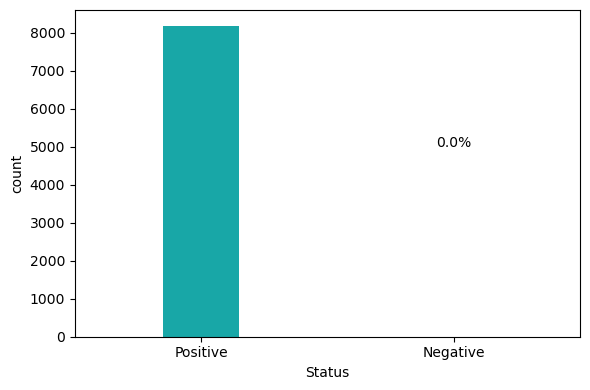

In [38]:
show_ngtve(features[['MarkDown1']])

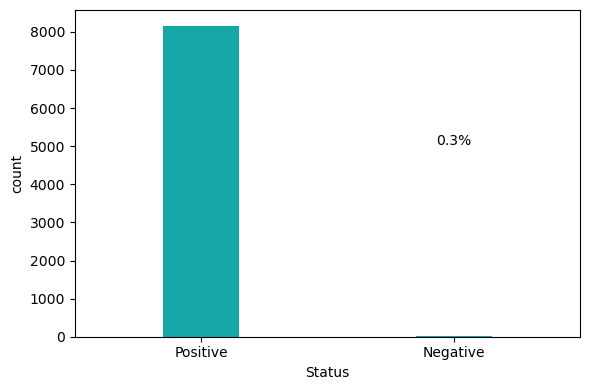

In [39]:
show_ngtve(features[['MarkDown2']])

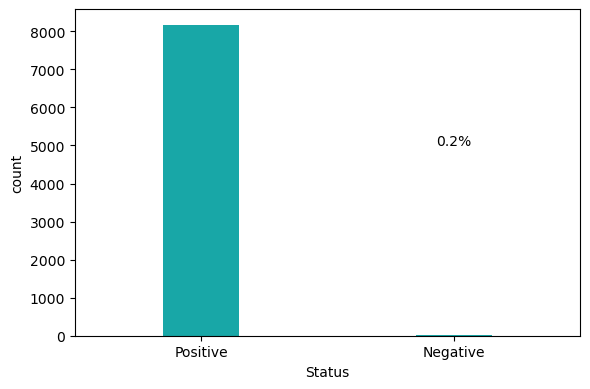

In [40]:
show_ngtve(features[['MarkDown3']])

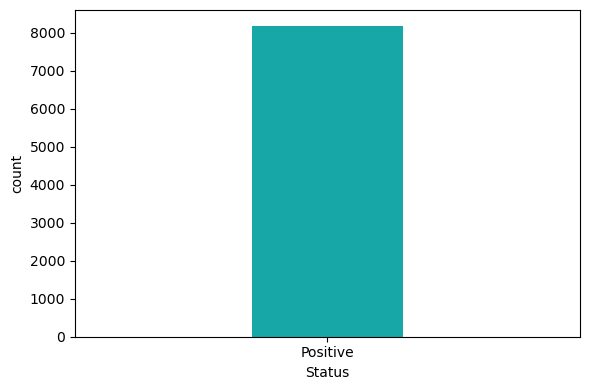

In [41]:
show_ngtve(features[['MarkDown4']])

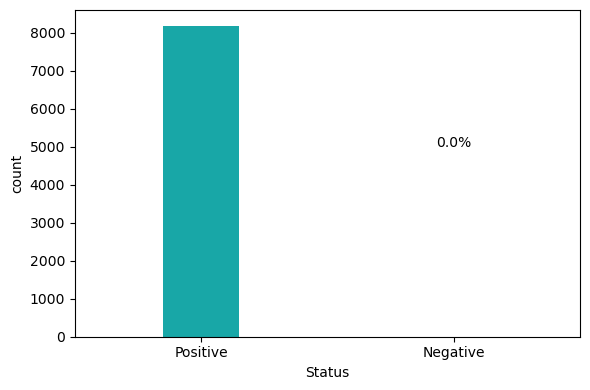

In [42]:
show_ngtve(features[['MarkDown5']])

#### *Quality Issues*:

**Features Dataset**:

1. The MarkDown columns contain null values. (Completeness)
2. The columns CPI and Unemployment contain null values. (Completeness)
3. The data types for columns Date and Store are not suitable. (Validity)
4. The MarkDown columns 1,2,4,5 contain negative values. (Validity)
5. The MarkDown columns contain extreme values (outliers). (Accuracy)

**Stores Dataset**:

6. The data types for columns Store and Type are not suitable. (Validity)

**Train Dataset**:

7. The data types for columns Store, Dept, and Date are not suitable. (Validity)
8. The column Weekly_Sales contain negative values and outliers. (Validity and Accuracy)

#### Tidiness Issues:

The requirements for tidy data are:

> Each variable forms a column.

> Each observation forms a row.

> Each type of observational unit forms a table.

* In order to make the data tidy, the datasets should be merged into one master dataset.

### Data Cleaning

In [43]:
# Make copies of the datasets:
features_=features.copy()
stores_=stores.copy()
train_=train.copy()

#### Quality Issues (Completeness):


##### Issue 1: The MarkDown columns contain null values.


**Define**:

As the null values in the markdown columns signify the absence of promotional markdowns on those specific weeks, the most effective approach to dealing with these missing values is to substitute them with zeros.

**Code**:

In [44]:
mark_down_columns = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']
features_[mark_down_columns] = features_[mark_down_columns].fillna(0)

**Test**:

In [45]:
features_.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


##### Issue 2: The columns CPI and Unemployment contain null values.

**Define**:

After further analysis we found that these columns are affected by 2 factors:

* Time: which can be represented by Date.
* Location: which can be estimated by Store number.

So,we will build functions to handle missing values in the columns CPI and Unemployment. Specifically, they use linear regression imputation to predict and fill in missing values the columns depending on time and location of each store.


**Code**:

In [46]:
def find_X(df):
    """
    Prepare the feature matrix X for linear regression imputation.

    This function extracts relevant features including 'Store' information,
    'year', and 'month' from the provided DataFrame.

    Parameters:
    df (DataFrame): The input DataFrame containing relevant data.

    Returns:
    DataFrame: A DataFrame with extracted features 'Store', one-hot encoded 'Store' values,
               'year', and 'month' columns.
    """
    df = df.reset_index()
    X = df[['Store']]
    encoder = OneHotEncoder(drop = 'first')
    encoded_data = encoder.fit_transform(df[['Store']])
    encoded_array = encoded_data.toarray()
    X = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['Store']))
    X['year'] = pd.to_datetime(df['Date']).dt.year
    X['month'] = pd.to_datetime(df['Date']).dt.month
    return X


def linear_NA_fill(df_no_null,df_to_fill ,column):
    """
    Perform linear regression-based imputation to fill missing values in a specific column.

    This function uses linear regression to predict and fill missing values in a specified
    column of the DataFrame `df_to_fill`, based on the information from the DataFrame `df_no_null`
    where the specified column has no missing values.

    Parameters:
    df_no_null (DataFrame): The DataFrame containing no missing values in the specified column.
    df_to_fill (DataFrame): The DataFrame containing missing values to be imputed.
    column (str): The name of the column to be imputed.

    Returns:
    ndarray: An array of predicted values, imputed using linear regression.
    """
    X = find_X(df_no_null)
    y = df_no_null[column]
    model = LinearRegression() 
    model.fit(X,y)   
    print (f'R2 for predicting {column} values is ',round(model.score(X,y),4))
    y_predict = model.predict(find_X(df_to_fill))
    return y_predict

In [47]:
df_no_null = features_.dropna()


df_to_fill = features_[features_['CPI'].isna()]
features_.loc[:,'CPI'][features_['CPI'].isna()] = linear_NA_fill(df_no_null,df_to_fill ,column = 'CPI')


df_to_fill = features_[features_['Unemployment'].isna()]
features_.loc[:,'Unemployment'][features_['Unemployment'].isna()] = linear_NA_fill(df_no_null,df_to_fill ,column = 'Unemployment')

R2 for predicting CPI values is  0.9988
R2 for predicting Unemployment values is  0.9351


**Test**:

In [48]:
features_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     8190 non-null   float64
 5   MarkDown2     8190 non-null   float64
 6   MarkDown3     8190 non-null   float64
 7   MarkDown4     8190 non-null   float64
 8   MarkDown5     8190 non-null   float64
 9   CPI           8190 non-null   float64
 10  Unemployment  8190 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


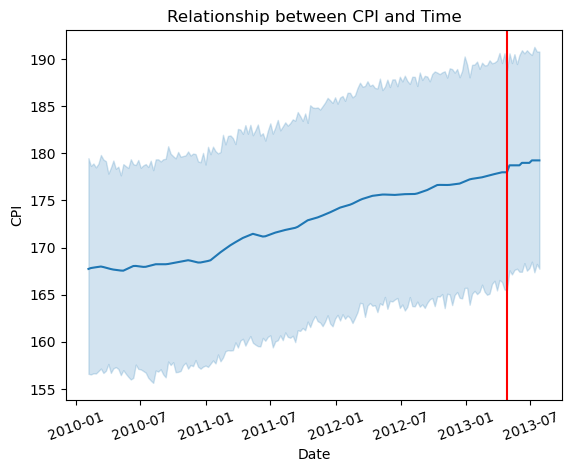

In [49]:
sns.lineplot(data=features_,x=pd.to_datetime(features_['Date']),y='CPI')
plt.axvline(pd.to_datetime(df_no_null.tail(1).Date),color='r')
plt.xticks(rotation=20);
plt.title('Relationship between CPI and Time');

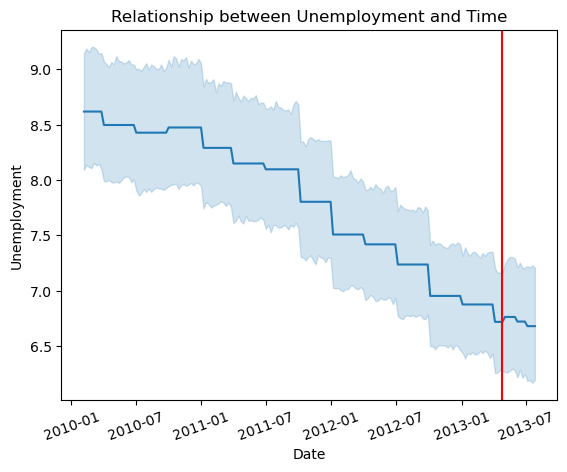

In [50]:
sns.lineplot(data=features_,x=pd.to_datetime(features_['Date']),y='Unemployment')
plt.axvline(pd.to_datetime(df_no_null.tail(1).Date),color='r')
plt.xticks(rotation=20);
plt.title('Relationship between Unemployment and Time');

#### Quality Issues (Validity):

##### Issue 3: The data types in features table for columns Date and Store are not suitable.

**Define**:

Change the data type for the column Date to become date time, and Store to become category.

**Code**:

In [51]:
features_.Date= pd.to_datetime(features_.Date)
features_.Store = features_.Store.astype('category')

**Test**:

In [52]:
features_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   category      
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     8190 non-null   float64       
 5   MarkDown2     8190 non-null   float64       
 6   MarkDown3     8190 non-null   float64       
 7   MarkDown4     8190 non-null   float64       
 8   MarkDown5     8190 non-null   float64       
 9   CPI           8190 non-null   float64       
 10  Unemployment  8190 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), category(1), datetime64[ns](1), float64(9)
memory usage: 657.4 KB


##### Issue 4: The data types in table stores for columns Store and Type are not suitable.

**Define**:

Change the data type for the column Store to become category, and Type to become category.

**Code**:

In [53]:
stores_.Store=stores_.Store.astype('category')
stores_.Type=stores_.Type.astype('category')

**Test**:

In [54]:
stores_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Store   45 non-null     category
 1   Type    45 non-null     category
 2   Size    45 non-null     int64   
dtypes: category(2), int64(1)
memory usage: 2.1 KB


##### Issue 5: The data types in table train for columns Store, Dept, and Date are not suitable.

**Define**:

Change the data type for the column Store to become category, Date to become datetime, and Dept to become category

**Code**:

In [55]:
train_.Date=pd.to_datetime(train_.Date)
train_.Store=train_.Store.astype('category')
train_.Dept=train_.Dept.astype('category')

**Test**:

In [56]:
train_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  category      
 1   Dept          421570 non-null  category      
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), category(2), datetime64[ns](1), float64(1)
memory usage: 7.6 MB


##### Issue 6: The MarkDown columns 1,2,4,5 contain negative values.

**Define**:

Drop the rows which contain negative values.

**Code**

In [57]:
features_.drop( features_[features_['MarkDown1']<0].index,inplace = True)
features_.drop( features_[features_['MarkDown2']<0].index,inplace = True)
features_.drop( features_[features_['MarkDown3']<0].index,inplace = True)
features_.drop( features_[features_['MarkDown4']<0].index,inplace = True)
features_.drop( features_[features_['MarkDown5']<0].index,inplace = True)
features_=features_.reset_index(drop=True)

**Test**:

In [58]:
features_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8146 entries, 0 to 8145
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8146 non-null   category      
 1   Date          8146 non-null   datetime64[ns]
 2   Temperature   8146 non-null   float64       
 3   Fuel_Price    8146 non-null   float64       
 4   MarkDown1     8146 non-null   float64       
 5   MarkDown2     8146 non-null   float64       
 6   MarkDown3     8146 non-null   float64       
 7   MarkDown4     8146 non-null   float64       
 8   MarkDown5     8146 non-null   float64       
 9   CPI           8146 non-null   float64       
 10  Unemployment  8146 non-null   float64       
 11  IsHoliday     8146 non-null   bool          
dtypes: bool(1), category(1), datetime64[ns](1), float64(9)
memory usage: 653.8 KB


In [59]:
features_[features_['MarkDown1']<0]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday


##### Issue 7: The column Weekly_Sales contain negative values and outliers.

**Define**:

After analyzing the number of negative values in the column Weekly_Sales, The best approach is to drop the rows which contain null values.

**Code**:

In [60]:
train_.drop( train_[train_['Weekly_Sales']<0].index,inplace = True)
train_=train_.reset_index(drop=True)

**Test**:

In [61]:
train_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420285 entries, 0 to 420284
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         420285 non-null  category      
 1   Dept          420285 non-null  category      
 2   Date          420285 non-null  datetime64[ns]
 3   Weekly_Sales  420285 non-null  float64       
 4   IsHoliday     420285 non-null  bool          
dtypes: bool(1), category(2), datetime64[ns](1), float64(1)
memory usage: 7.6 MB


#### Tidiness Issues:

**Define**:

Prior to combining the datasets, it's essential to thoroughly comprehend their granularity, which entails understanding the meaning of each individual row within the dataset. Below is a concise overview of the significance of each table at the row level:

* Feature Table: Each entry in the feature table corresponds to information about a specific store during a particular business week. These details are categorized into two distinct groups: Regional Information (e.g., Temperature, Unemployment, etc.) and Promotional Information (e.g., Advertising options).

* Stores Table: This is a straightforward table that directly provides information concerning each individual store, including details such as its Type and Size.

* Train Table: The central dataset contains sales data for each store as well as departmental information on a weekly basis.

The main objective is to merge the three distinct tables, namely the Feature Table, Stores Table, and Train Table, into a consolidated and comprehensive master dataset. This unified dataset will contain a harmonized representation of store-specific information, including regional and promotional details, sales data, and store attributes. By merging these tables, we aim to create a centralized resource that facilitates more comprehensive analyses, enables a holistic understanding of store performance, and enhances the accuracy of sales predictions through the integration of relevant factors.

**Code**:

In [62]:
train_stores = pd.merge(left = train_, right =stores_, how = 'left',on='Store' )

In [63]:
master_df = pd.merge(left = train_stores, right =features_, how = 'inner',on=['Date','Store'] )

**Test**:

In [64]:
# No null values after the 1st merge which is good.
train_stores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420285 entries, 0 to 420284
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         420285 non-null  category      
 1   Dept          420285 non-null  category      
 2   Date          420285 non-null  datetime64[ns]
 3   Weekly_Sales  420285 non-null  float64       
 4   IsHoliday     420285 non-null  bool          
 5   Type          420285 non-null  category      
 6   Size          420285 non-null  int64         
dtypes: bool(1), category(3), datetime64[ns](1), float64(1), int64(1)
memory usage: 14.4 MB


In [65]:
# Also, no null values after the 2st merge.
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418727 entries, 0 to 418726
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         418727 non-null  category      
 1   Dept          418727 non-null  category      
 2   Date          418727 non-null  datetime64[ns]
 3   Weekly_Sales  418727 non-null  float64       
 4   IsHoliday_x   418727 non-null  bool          
 5   Type          418727 non-null  category      
 6   Size          418727 non-null  int64         
 7   Temperature   418727 non-null  float64       
 8   Fuel_Price    418727 non-null  float64       
 9   MarkDown1     418727 non-null  float64       
 10  MarkDown2     418727 non-null  float64       
 11  MarkDown3     418727 non-null  float64       
 12  MarkDown4     418727 non-null  float64       
 13  MarkDown5     418727 non-null  float64       
 14  CPI           418727 non-null  float64       
 15  Unemployment  418

In [66]:
master_df.drop(columns=['IsHoliday_y'],inplace=True)
master_df.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True)


In [67]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418727 entries, 0 to 418726
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         418727 non-null  category      
 1   Dept          418727 non-null  category      
 2   Date          418727 non-null  datetime64[ns]
 3   Weekly_Sales  418727 non-null  float64       
 4   IsHoliday     418727 non-null  bool          
 5   Type          418727 non-null  category      
 6   Size          418727 non-null  int64         
 7   Temperature   418727 non-null  float64       
 8   Fuel_Price    418727 non-null  float64       
 9   MarkDown1     418727 non-null  float64       
 10  MarkDown2     418727 non-null  float64       
 11  MarkDown3     418727 non-null  float64       
 12  MarkDown4     418727 non-null  float64       
 13  MarkDown5     418727 non-null  float64       
 14  CPI           418727 non-null  float64       
 15  Unemployment  418

In [68]:
master_df[master_df.CPI.isnull()]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment


#### Quality Issues (Accuracy):

##### Issue 8: The column Weekly_Sales contain negative values and outliers.
##### Issue 9: The MarkDown columns contain extreme values (outliers)

**Define**:

Since we are trying to predict weekly sales its not a wise move to drop outliers since this will affect the model's performance and the ability to predict the sales for out-of-sample data.The same thing applies for Mark Down Promotions.

#### Temperature Transformation:

**Transforming Temperature from Fahrenheit to Celsius to make it more interpretable.**

In [69]:
master_df['Temperature']= (master_df['Temperature']-32)*5/9

## Data Visualization

### Univariate Visualizations

#### 1. What is the distribution of weekly sales?

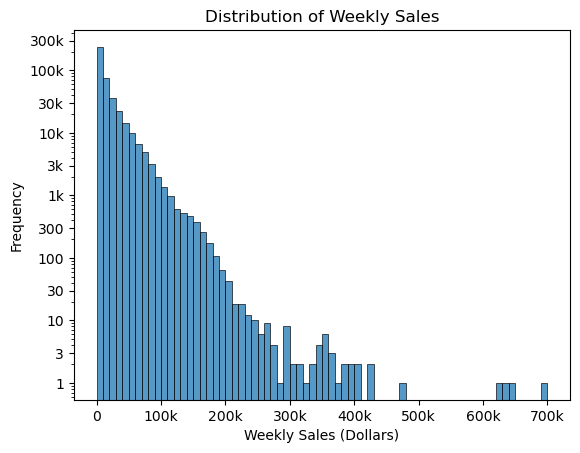

In [70]:
ax=sns.histplot(data=master_df,x='Weekly_Sales',binwidth=10000,)
plt.yscale('log')
yticks=[1,3,10,30,100,300,1000,3000,10000,30000,100000,300000]
plt.yticks(yticks,[1,3,10,30,100,300,'1k','3k','10k','30k','100k','300k']);
xticks=np.linspace(0,700000,num=8).astype(int)
plt.xticks(xticks,[0,'100k','200k','300k','400k','500k','600k','700k']);
plt.xlabel('Weekly Sales (Dollars)')
plt.ylabel('Frequency')
plt.title('Distribution of Weekly Sales')
plt.show()

* The distribution of weekly sales is highly skewed to the right.
* The most common weekly sales are between 0 and 20k Dollars.

#### 2.How many distinct store types are present in our dataset?

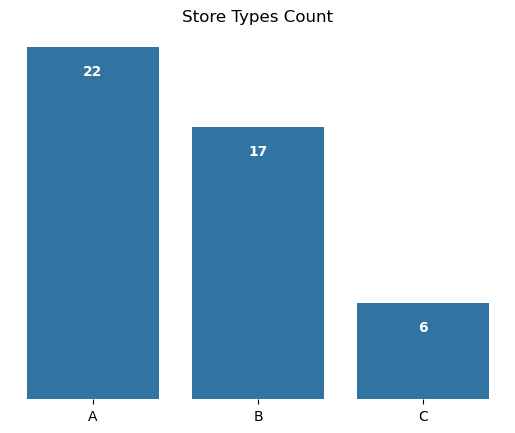

In [71]:
df_types=master_df[['Store','Type']].drop_duplicates(subset='Store')['Type'].value_counts().to_frame().rename(columns={'Type':'Type_counts'})
sns.barplot(data=df_types,x=df_types.index,y='Type_counts',color=sns.color_palette()[0])
for index,values in enumerate(df_types.Type_counts.tolist()):
    plt.text(index,values-1.5,values,ha='center',va='center',color='w',weight='bold')
ax=plt.gca()
ax.set_frame_on(False)
ax.set_yticks(ticks=[])
ax.set_ylabel('')
ax.set_title('Store Types Count')
plt.show()

* It seems that the dataset contains three varieties of stores, with type A being the most prevalent and type C being the least prevalent.

#### 3.How many holidays are included in the set of unique dates within the dataset?

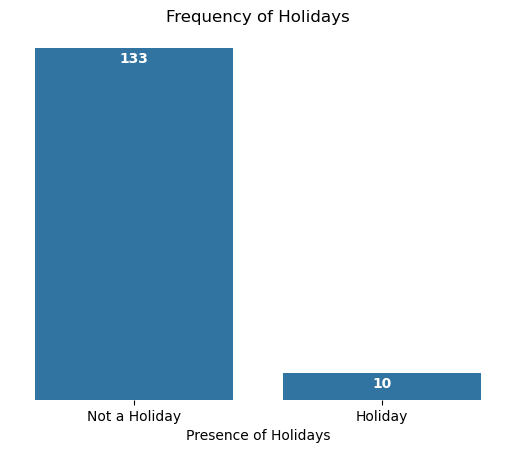

In [72]:
df_holidays=master_df[['Date','IsHoliday']].drop_duplicates(subset='Date')['IsHoliday'].value_counts().to_frame().rename(columns={'IsHoliday':'holidays_counts'})
df_holidays = df_holidays.reset_index().rename(columns={'IsHoliday': 'Holiday'})

sns.barplot(data=df_holidays, x=df_holidays.index, y='holidays_counts', color=sns.color_palette()[0])
for index, values in enumerate(df_holidays['holidays_counts'].tolist()):
    plt.text(index, values - 4, values, ha='center', va='center', color='w', weight='bold')

ax = plt.gca()
ax.set_frame_on(False)
ax.set_yticks(ticks=[])
ax.set_ylabel('')
ax.set_xlabel('Presence of Holidays')
ax.set_title('Frequency of Holidays')
plt.xticks([0, 1], ['Not a Holiday', 'Holiday'])
plt.show()

* During the period spanning from February 5, 2010, to October 26, 2012, a total of 10 weeks are characterized by the presence of holidays, whereas 133 weeks transpire devoid of any holiday occurrences.

#### 4. How are the temperatures distributed across the weeks?

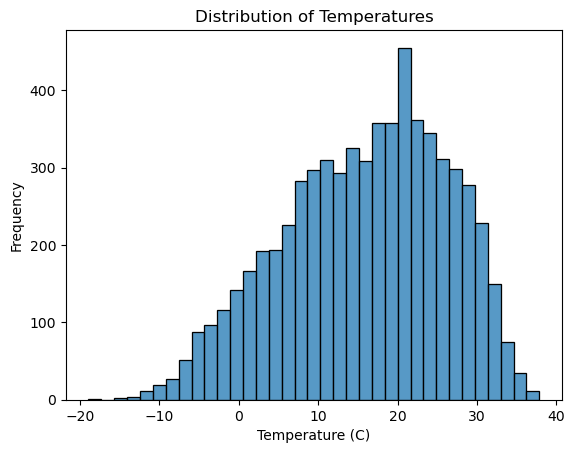

In [73]:
Temps=master_df[['Store','Temperature','Date']].groupby(['Date','Store'])['Temperature'].mean()
g=sns.histplot(Temps)
g.set(xlabel= 'Temperature (C)',ylabel='Frequency')
g.set_title('Distribution of Temperatures')
plt.show()

* The distribution of temperatures is almost normally distributed.
* The most common temperatures are between 15 C and 25 C.

#### 5.What is the arrangement of sales across Markdown Type 1?

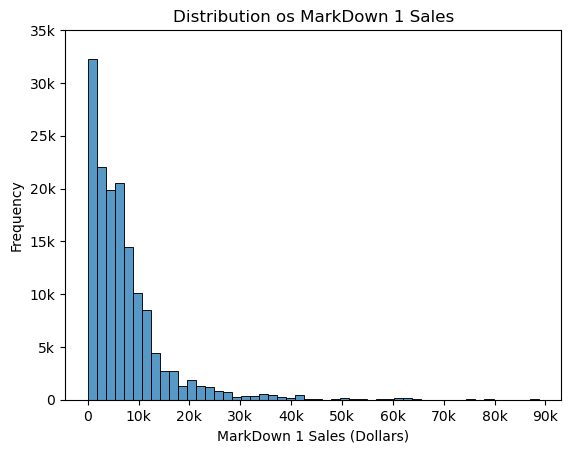

In [74]:
mark_1=master_df[master_df.MarkDown1!=0]['MarkDown1']
ax=sns.histplot(mark_1,bins=50)
yticks=[0,5000,10000,15000,20000,25000,30000,35000]
plt.yticks(yticks,[0,'5k','10k','15k','20k','25k','30k','35k']);
xticks=np.linspace(0,90000,10)
plt.xticks(xticks,[0,'10k','20k','30k','40k','50k','60k','70k','80k','90k']);
ax.set(xlabel='MarkDown 1 Sales (Dollars)',ylabel='Frequency')
ax.set_title('Distribution os MarkDown 1 Sales')
plt.show()

* The distribution of markdown 1 sales is highly skewed to the right.
* The most common amount of markdown 1 sales are between 0 and 10k Dollars.

### Bivariate Visualizations

#### 1. Is there a noticeable trend in weekly sales in relation to holiday and non-holiday weeks?

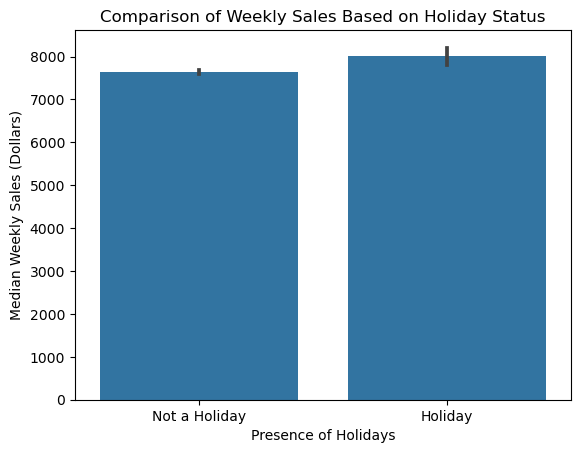

In [75]:
color=sns.color_palette()[0]
sns.barplot(data=master_df,x='IsHoliday',y='Weekly_Sales',color=color,estimator=np.median)
plt.xticks([0, 1], ['Not a Holiday', 'Holiday'])
plt.xlabel('Presence of Holidays')
plt.ylabel('Median Weekly Sales (Dollars)')
plt.title('Comparison of Weekly Sales Based on Holiday Status')
plt.show()

* There is  a slight elevation in sales during weeks with holidays in comparison to regular weeks.
* This outcome forms the basis of a hypothesis we intend to verify through hypothesis testing, aiming to establish whether this observed difference in sales is statistically meaningful rather than occurring by chance.

#### 2. Does the presence of MarkDown 3 correlate with observable differences in weekly sales behavior?

In [76]:
dfmarks = master_df[['MarkDown3', 'Weekly_Sales']]
dfmarks['ismarkdown'] = [0 if x['MarkDown3'] == 0 else 1 for _, x in dfmarks.iterrows()]

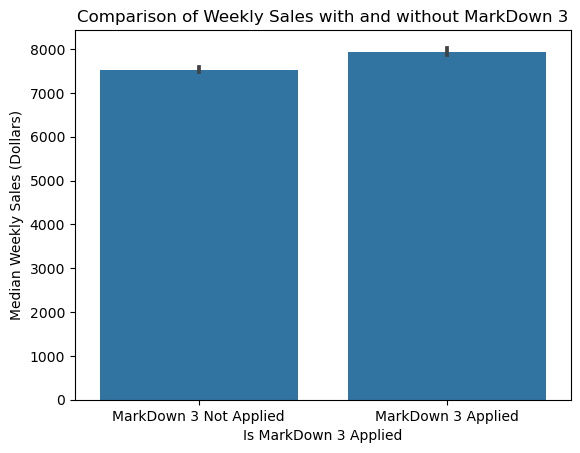

In [77]:
sns.barplot(data=dfmarks,x='ismarkdown',y='Weekly_Sales',color=color,estimator=np.median)
plt.xticks([0, 1], ['MarkDown 3 Not Applied', 'MarkDown 3 Applied'])
plt.xlabel('Is MarkDown 3 Applied')
plt.ylabel('Median Weekly Sales (Dollars)')
plt.title('Comparison of Weekly Sales with and without MarkDown 3')
plt.show()

* The data indicates that when MarkDown 3 is used, weekly sales tend to be higher. This suggests that applying MarkDown 3 is associated with increased consumer purchases. However, additional analysis is required to confirm the significance of this trend and account for other potential factors affecting sales.

#### 3. How does the median size of Walmart stores vary across different store types?

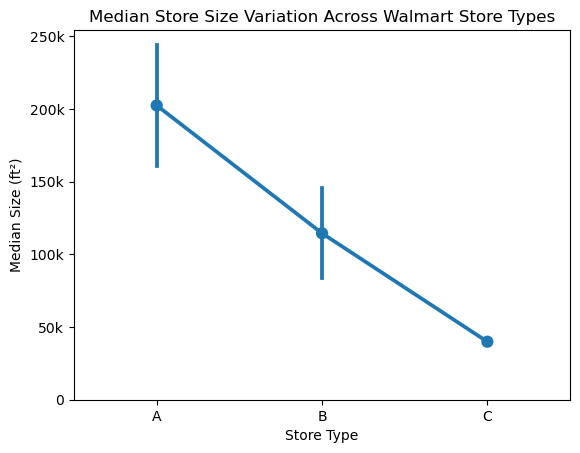

In [78]:
sns.pointplot(data=master_df,x='Type',y='Size',errorbar='sd',estimator=np.median)
plt.xlabel('Store Type')
plt.ylabel('Median Size (ft²)')
plt.title('Median Store Size Variation Across Walmart Store Types')
plt.yticks([0,50000,100000,150000,200000,250000],[0,'50k','100k','150k','200k','250k'])
plt.show()

* The analysis reveals that Walmart store type A possesses the highest median size among the three store types: A, B, and C. 
* Additionally, store type A also exhibits the greatest variation in size when compared to types B and C. This suggests that store type A tends to encompass both larger and smaller stores within its category. The variance in size might be indicative of different store formats or strategies within this particular type.

#### 4. How do holidays like Christmas Day and Thanksgiving Day impact the pattern of average weekly sales over the observed period?

In [79]:
g=master_df.groupby(['Date','IsHoliday'])['Weekly_Sales'].mean().sort_values(ascending=False)

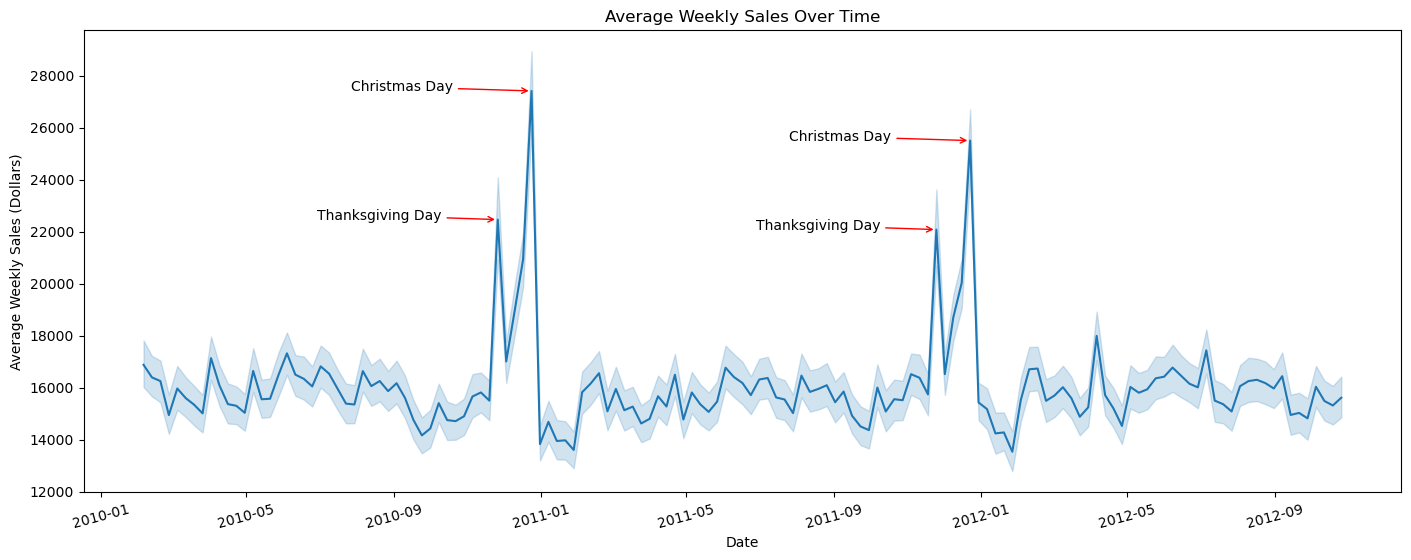

In [80]:
from datetime import timedelta
plt.figure(figsize=(17,6))
sns.lineplot(data=master_df,x=master_df.Date,y='Weekly_Sales')
plt.xticks(rotation=15);
plt.annotate('Christmas Day',xy=(g.index[0][0],g[0]),xytext=(g.index[0][0]-timedelta(150),g[0]),arrowprops={'arrowstyle':'->','color':'r'})
plt.annotate('Christmas Day',xy=(g.index[1][0],g[1]),xytext=(g.index[1][0]-timedelta(150),g[1]),arrowprops={'arrowstyle':'->','color':'r'})
plt.annotate('Thanksgiving Day',xy=(g.index[2][0],g[2]),xytext=(g.index[2][0]-timedelta(150),g[2]),arrowprops={'arrowstyle':'->','color':'r'})
plt.annotate('Thanksgiving Day',xy=(g.index[3][0],g[3]),xytext=(g.index[3][0]-timedelta(150),g[3]),arrowprops={'arrowstyle':'->','color':'r'})

plt.xlabel('Date')
plt.ylabel('Average Weekly Sales (Dollars)')
plt.title('Average Weekly Sales Over Time')
plt.show()

* The analysis highlights a distinct trend where holidays, notably Christmas Day and Thanksgiving Day, exhibit the highest average weekly sales among the observed time period. This suggests that these holidays prompt increased consumer spending, resulting in elevated average sales figures. 

#### 5. Is there a discernible relationship or correlation between the Consumer Price Index (CPI) and the Unemployment Rate?

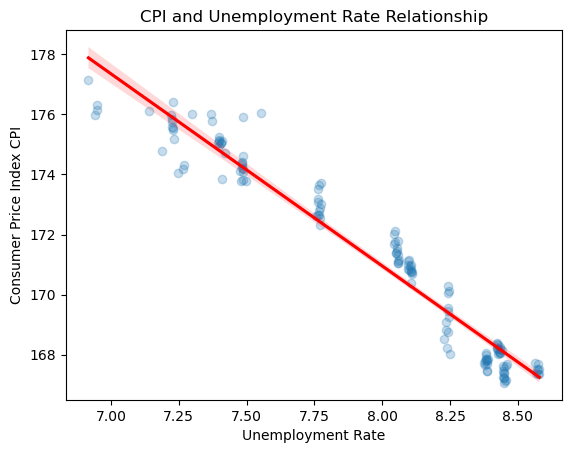

In [81]:
unemp_cpi=master_df.groupby('Date')['Unemployment','CPI'].mean()
sns.regplot(data=unemp_cpi,x='Unemployment',y='CPI',line_kws=dict(color='r'),scatter_kws=dict(alpha=0.25))
plt.xlabel('Unemployment Rate')
plt.ylabel('Consumer Price Index CPI')
plt.title('CPI and Unemployment Rate Relationship')
plt.show()

* Economic theory suggests that the rate of inflation rises as unemployment rates fall. This has been formalized according to what is known as the Phillips Curve. According to the Phillips Curve, lower unemployment means people spend more, leading to more pressure on prices.
* When the CPI is rising it means that consumer prices are also rising, and when it falls it means consumer prices are generally falling. In short, a higher CPI indicates higher inflation, while a falling CPI indicates lower inflation, or even deflation.

#### 6. Which store type demonstrates the highest median weekly sales, and how do other types compare?

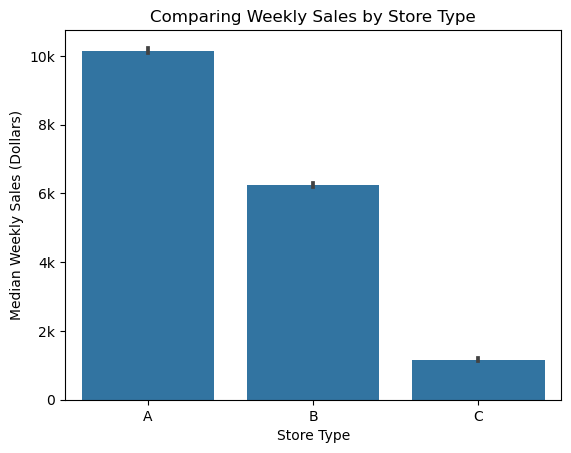

In [82]:
sns.barplot(data=master_df,x='Type',y='Weekly_Sales',color=color,estimator=np.median,errorbar='ci')
plt.xlabel('Store Type')
plt.ylabel('Median Weekly Sales (Dollars)')
plt.title("Comparing Weekly Sales by Store Type")
plt.yticks([0,2000,4000,6000,8000,10000],[0,'2k','4k','6k','8k','10k'])
plt.show()

* Among the different store types, store type A stands out with the highest median weekly sales. In comparison to types B and C, store type A consistently maintains a higher median sales figure. This suggests that store type A tends to perform better in terms of weekly sales when compared to the other store types, B and C.

### Multivariate Visualizations

#### 1. How does the median weekly sales for different store types vary, and is there a notable difference in this variation when considering whether a week is a holiday or not?

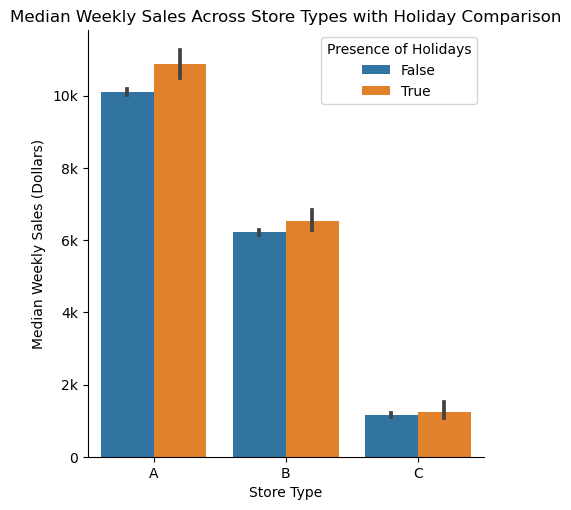

In [83]:
master_df.head()
sns.catplot(data=master_df,x='Type',y='Weekly_Sales',hue='IsHoliday',estimator=np.median,kind='bar',legend=False)
plt.legend(title='Presence of Holidays')
plt.xlabel('Store Type')
plt.ylabel('Median Weekly Sales (Dollars)')
plt.title('Median Weekly Sales Across Store Types with Holiday Comparison')
plt.yticks([0,2000,4000,6000,8000,10000],[0,'2k','4k','6k','8k','10k'])
plt.show()

* The presented clustered bar chartillustrates the median weekly sales distribution across various store types, categorized by whether the week is a holiday or not. It is evident that store type A consistently maintains the highest median weekly sales compared to types B and C, regardless of the holiday status. Additionally, the plot provides insights into the potential impact of holidays on weekly sales, showcasing any deviations in median sales for different store types during holiday weeks.

#### 2. How do the weekly sales patterns of store types A, B, and C compare over the observed time period?

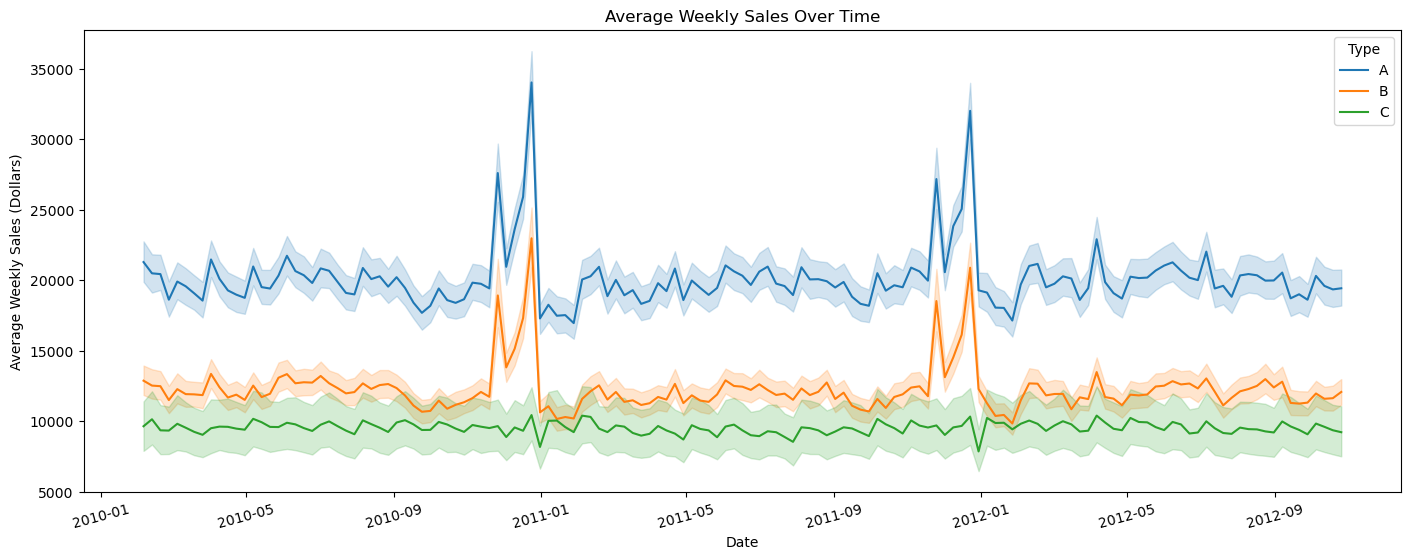

In [84]:
plt.figure(figsize=(17,6))
sns.lineplot(data=master_df,x=master_df.Date,y='Weekly_Sales',hue='Type')
plt.xticks(rotation=15);

plt.xlabel('Date')
plt.ylabel('Average Weekly Sales (Dollars)')
plt.title('Average Weekly Sales Over Time')
plt.show()

* The line plot provides a clear visualization of how weekly sales trends vary across different store types. Each store type is represented by a distinct color, allowing for easy comparison. Notably, store type A consistently displays the highest sales throughout the observed period, followed by store types B and C. This visualization enables us to understand the relative performance of each store type over time.
* During holiday periods such as Christmas and Thanksgiving, there is a notable absence of sharp increases in weekly sales for stores of type C. Their sales exhibit a consistent pattern over time. This might be attributed to the possibility that type C stores specialize in products less influenced by seasonal variations.

#### 3. What conclusions can be drawn about the performance of individual stores in relation to their types? 

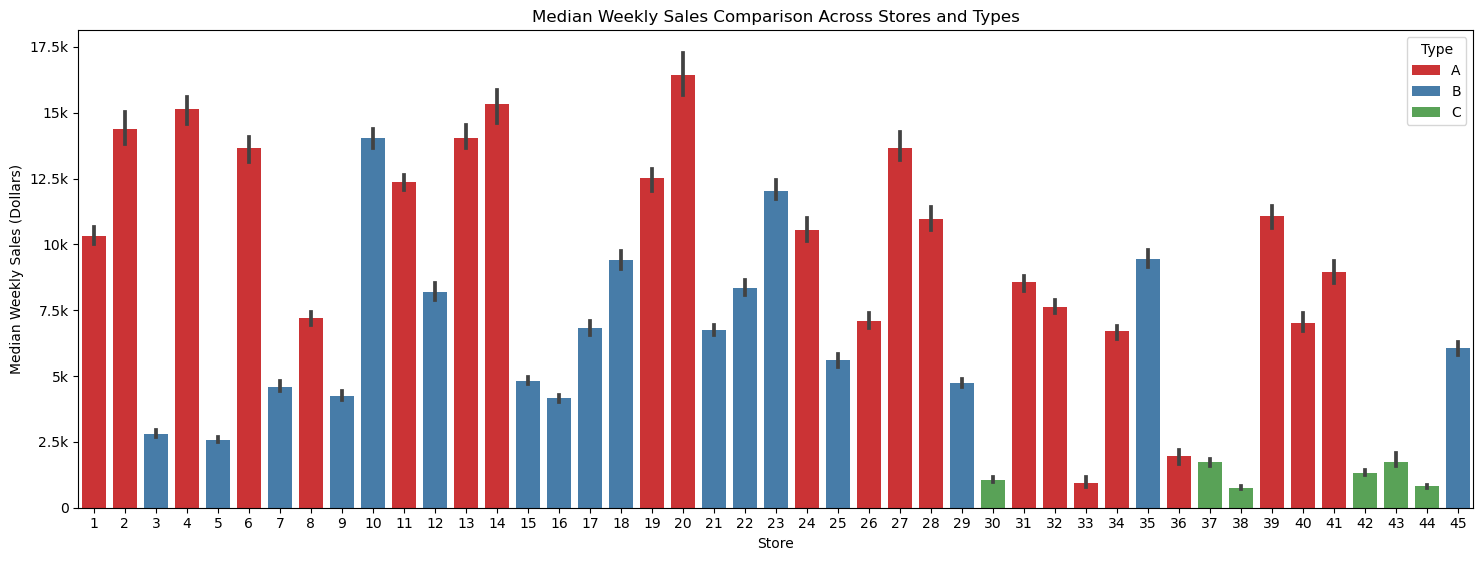

In [85]:
plt.figure(figsize=(18,6.2))
sns.barplot(data=master_df,x='Store',y='Weekly_Sales',hue='Type',palette='Set1',estimator=np.median,dodge=False)
plt.xlabel('Store')
plt.ylabel('Median Weekly Sales (Dollars)')
plt.title("Median Weekly Sales Comparison Across Stores and Types")
plt.yticks([0,2500,5000,7500,10000,12500,15000,17500],[0,'2.5k','5k','7.5k','10k','12.5k','15k','17.5k'])
plt.show()

* The analysis of the provided visualization indicates that the performance of individual stores is notably influenced by their respective types. Store types A, B, and C exhibit distinct characteristics in terms of median weekly sales. Store type A consistently showcases the highest median weekly sales, suggesting its potential strength in attracting higher customer spending. On the other hand, store types B and C display comparatively lower median weekly sales.

* This discrepancy in median weekly sales among the different store types could reflect variations in product offerings, customer demographics, geographical locations, and marketing strategies. Store type A might cater to higher-end or high-demand products, contributing to its strong sales performance. Meanwhile, store types B and C might have different market focuses or customer bases that impact their median sales figures.

## Hypothesis Testing

We aim to numerically evaluate the following three hypotheses:

1) Sales demonstrate an increase during weeks that encompass holidays.
2) Stores categorized as "A" grade exhibit superior sales compared to those categorized as "B" type, and "B" grade stores outperform "C" grade ones.
3) The application of MarkDown promotional decisions per Store correlates with elevated sales levels.

### 1. Sales demonstrate an increase during weeks that encompass holidays.

Null Hypothesis ($H_0$): Sales during holidays are equal to sales during normal days.

Alternative Hypothesis ($H_1$): Sales during holidays are greater than sales during normal days.

In [86]:
import scipy.stats as stats
def is_true(value):
    if value:
        return 1
    else:
        return 0
alpha=0.05  
# Inplace IsHoliday with ones and zeros
master_df['IsHoliday'] = master_df['IsHoliday'].apply(is_true)
master_df.head()

# Extract sales data for normal days and holiday days
x1 = master_df[master_df['IsHoliday'] == 0]['Weekly_Sales']
x2 = master_df[master_df['IsHoliday'] == 1]['Weekly_Sales']

# Perform one-sided t-test for holiday sales being greater than normal sales
p_value = stats.ttest_ind(x2, x1, alternative='greater')[1]
if p_value > alpha:
    print(f' The P-value of {p_value} is greater than alpha {alpha}, so we failed to reject the null hypothesis')
else:
    print(f'The P-value of {p_value} is less than alpha {alpha}, so we reject the null hypothesis')

The P-value of 1.4322935924693767e-17 is less than alpha 0.05, so we reject the null hypothesis


**Conclusion**:

Through hypothesis testing, we establish a conclusion that the sales during holidays exhibit a statistically significant increase compared to the sales observed during regular weeks.

### 2. Stores categorized as "A" grade exhibit superior sales compared to those categorized as "B" type, and "B" grade stores outperform "C" grade ones.

Null Hypothesis ($H_0$): No effect of Store Type on Store Sales: 

**Sales\_A = Sales\_B = Sales\_C** 

Alternative Hypothesis ($H_1$): There is a direct increase in sales when Store type changes from C to A: 

**Sales\_A > Sales\_B > Sales\_C** 

In [87]:
xA = master_df[master_df['Type'] == 'A']['Weekly_Sales']
xB = master_df[master_df['Type'] == 'B']['Weekly_Sales']
xC = master_df[master_df['Type'] == 'C']['Weekly_Sales']

p_value_A = stats.ttest_ind(xA, xB, alternative='greater')[1]
p_value_B = stats.ttest_ind(xB, xC, alternative='greater')[1]


if p_value_A > alpha:
    print(f' The P-value-A of {p_value_A} is greater than alpha {alpha}, so we failed to reject the null hypothesis')
else:
    print(f'The P-value-A of {p_value_A} is less than alpha {alpha}, so we reject the null hypothesis')
    
if p_value_B > alpha:
    print(f' The P-value-B of {p_value_B} is greater than alpha {alpha}, so we failed to reject the null hypothesis')
else:
    print(f'The P-value-B of {p_value_B} is less than alpha {alpha}, so we reject the null hypothesis')

The P-value-A of 0.0 is less than alpha 0.05, so we reject the null hypothesis
The P-value-B of 2.9667046264551238e-192 is less than alpha 0.05, so we reject the null hypothesis


**Conclusion**:
As the P-values approach nearly zero, we reject the null hypothesis ($H_0$) and can infer that the representation of store sales based on type follows the pattern **Sales_A > Sales_B > Sales_C**.

### 3. The application of MarkDown promotional decisions per Store correlates with elevated sales levels.

($H_0$): No effect of MarkDown Promotional decisions on Store Sales,

**Sales with MarkDowns = Sales without MarkDowns**

($H_1$): There are direct affect of MarkDown Promotional decisions on Store Sales, 

**Sales with MarkDowns > Sales without MarkDowns**

In [88]:
stores_list = list(master_df['Store'].unique())
result = pd.DataFrame({'Store':stores_list})
result_sample_size = pd.DataFrame({'Store':stores_list})
alpha = 0.05

def hypo_test(mark_down, store):
    """
    Perform a hypothesis test to compare sales between two subsets of data based on markdown usage.

    Parameters:
        mark_down (str): Column name representing the markdown usage.
        store (int): Store identifier.
        alpha (float): Significance level for the hypothesis test (default is 0.05).

    Returns:
        None: Appends the results of the hypothesis test to 'result_markdown' and 'result_size_' lists.
    """
    x1 = master_df[(master_df[mark_down] != 0) & (master_df['Store'] == store)]['Weekly_Sales']
    x2 = master_df[(master_df[mark_down] == 0) & (master_df['Store'] == store)]['Weekly_Sales']
    p_value = stats.ttest_ind(x1, x2, alternative='greater')[1]*10000//1/10000
    if p_value > alpha:
        p_value = 0
    else:
        p_value = 1
    result_markdown.append(p_value)
    result_size_.append(x1.shape[0])



for mark_down in mark_down_columns:
    result_markdown = []
    result_size_ = []
    for store in stores_list:
        hypo_test(mark_down, store)
    result_sample_size[mark_down] = result_size_
    result[mark_down] = result_markdown

result['Total'] = result[mark_down_columns].sum(axis=1)

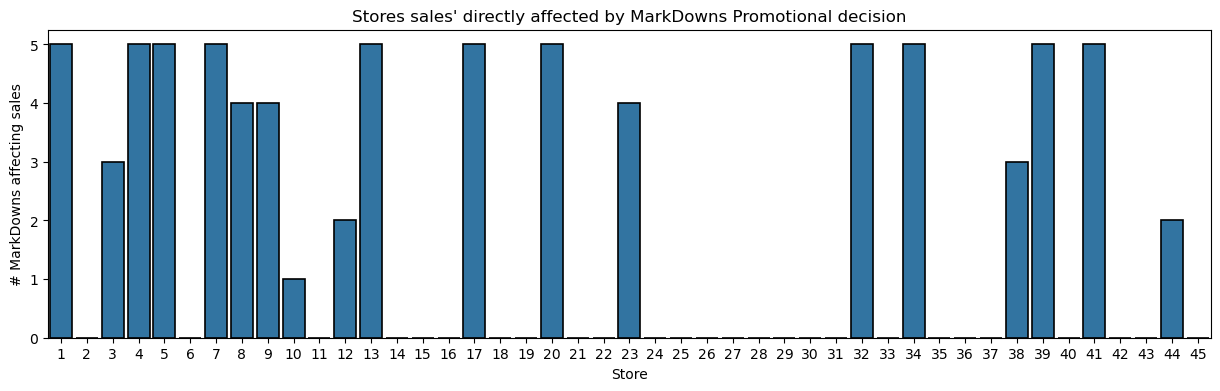

In [89]:
df = result[result['Total']>-1]
plt.figure(figsize=(15,4))
sns.barplot(df, x='Store', y= 'Total', color=sns.color_palette()[0], width=0.85,edgecolor='black', linewidth = 1.2)
plt.title("Stores sales' directly affected by MarkDowns Promotional decision")
plt.ylabel('# MarkDowns affecting sales')
plt.show()

this code generates a bar plot that illustrates the relationship between store sales and the influence of MarkDowns' promotional decisions. Each bar represents a store, and the height of the bar reflects the total number of MarkDowns that impact sales for that store. The code helps visualize how MarkDowns affect store sales across different stores.

In [90]:
# min sample size is 262 which is large enough for hypothesis testing
result_sample_size[mark_down_columns].min()

MarkDown1    2143
MarkDown2     706
MarkDown3     793
MarkDown4     262
MarkDown5    2187
dtype: int64

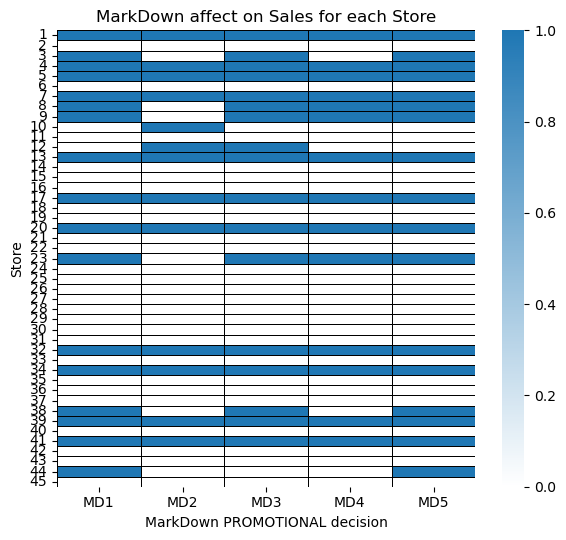

In [91]:
import matplotlib.colors as mcolors
custom_colors = ['white',sns.color_palette()[0]]
custom_cmap = mcolors.LinearSegmentedColormap.from_list("CustomColormap", custom_colors, N=256)


xticklabels = ['MD1','MD2','MD3','MD4','MD5']
plt.figure(figsize=(6,5.5))
sns.heatmap(result[mark_down_columns], cmap=custom_cmap, linewidths=0.5, linecolor='k',yticklabels=df['Store'],xticklabels=xticklabels,vmin=0, vmax=1 )

plt.title('MarkDown affect on Sales for each Store')
plt.xlabel('MarkDown PROMOTIONAL decision')
plt.ylabel('Store')
plt.tight_layout()
plt.show()

This generates a heatmap that illustrates the impact of MarkDown promotional decisions on sales for each store. The y-axis represents different stores, the x-axis represents MarkDown promotional decisions, and the color intensity in the heatmap indicates the degree of impact (scaled between 0 and 1).

**Conclusion**:
As the P-values are below 0.05 for certain stores, we partially reject the null hypothesis ($H_0$), indicating that markdown promotional decisions have an impact on sales for some stores while other stores remain unaffected.

## Feature Extraction

Two features can be derived from the Weekly Sales Date:

* Year
* Month

Extracting the year and month from the Week Date is viable, as both exhibit a robust connection in delineating the weekly sales pattern, as demonstrated earlier through time series analysis of sales.

In [92]:
master_df['Year'] = master_df['Date'].dt.year
master_df['Month'] = master_df['Date'].dt.month
master_df.Month = master_df.Month.astype('category') # Set the month as category
master_df.drop('Date', axis = 1, inplace = True)


# Reorder The columns
master_df = master_df[['Store','Dept','Year','Month','Weekly_Sales','IsHoliday',
                       'Type','Size','Temperature','Fuel_Price','MarkDown1',
                       'MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment']]


### Model Performance Evaluation Following Incorporation of Two Features: Year and Month Extraction

In [116]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
df = master_df.copy()
Model = DecisionTreeRegressor

def run_model(x,y):
    '''
    A function to run a Decision Tree machine learning model and returns the output result accuracy
    '''
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

    model = Model()
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    return r2_score(y_test,predictions)*100//1/100

x = pd.get_dummies(df.drop(['Year','Month'], axis=1), drop_first= True).drop('Weekly_Sales', axis = 1)
y = df['Weekly_Sales']
print(f'R2 Score without Year,Month Features: {run_model(x,y)}')

x = pd.get_dummies(df, drop_first= True).drop('Weekly_Sales', axis = 1)
print(f'R2 Score with Year,Month Features: {run_model(x,y)}')

R2 Score without Year,Month Features: 0.91
R2 Score with Year,Month Features: 0.94


**As a result**:

Adding the features of Year and Month have **increased model performance with 3%** and that's logical, as the sales follows certain trend throughout the time and are seasonal affected.

So we will simply keep the newly added features (Year, Month) in our model.

## Features Selection

We run feature selection using **mRMR** and **RFE** models with different **k** values, **k** represents the number of columns we want to select.
The **Feature selection model** & **k** with higher accuracy will be the one to be chosen in our next stages in training sales forecast model.

In [148]:
from sklearn.feature_selection import SelectKBest, f_regression, RFE
def run_model_MRMR(k):
    '''
    Peform feature selection using the mRMR method, given a certain number of columns.
    The function will append model accuracy with the result array
    '''
    slct_best = SelectKBest(k=k, score_func=f_regression)
    slct_best = slct_best.fit(x, y)
    x_trans = slct_best.transform(x)
    model = Model()
    model.fit(x_trans, y)
    predictions = model.predict(x_trans)
    r2 = r2_score(y, predictions)
    result.append({'k': k, 'MRMR R2': r2})
    
    
def run_model_greedy(k):
    '''
    Peform feature selection using the RFE method, given a certain number of columns.
    The function will append model accuracy with the result array
    '''
    model = Model()
    rfe = RFE(model,n_features_to_select = k)
    rfe = rfe.fit(x,y)
    x_trans = rfe.transform(x)
    model = Model()
    model.fit(x_trans,y)
    predictions = model.predict(x_trans)
    print(k)
    return r2_score(y,predictions)
    

result = []
k_range = list(range(1, len(x.columns), 20))
k_range.append(len(x.columns))

for k in k_range:
    print(k)
    run_model_MRMR(k)


result = pd.DataFrame(result)

### UNCOMMENT ME TO GET RESULT OF GREEDY, TOOK HOURS TO RUN

# result_greedy = []
# for k in result['k']:    
#     result_greedy.append(run_model_greedy(k))    
# result['greedy'] = result_greedy    
# ax = plt.figure(figsize=(10,5))    
# result['MRMR R2'] = result['MRMR R2']/100   
# result['greedy'] = result['greedy']/100    
# plt.plot(result['k'],result['MRMR R2'], label = 'mRMR')    
# plt.plot(result['k'],result['greedy'], label = 'RFE')    
# plt.legend()    
# plt.title('Number of features vs Model accuracy using RFE & mRMR')   
# plt.xlabel('Columns number')
# plt.ylabel('Model accuracy')
# plt.grid() 
# plt.show()

1
21
41
61
81
101
121
141
149


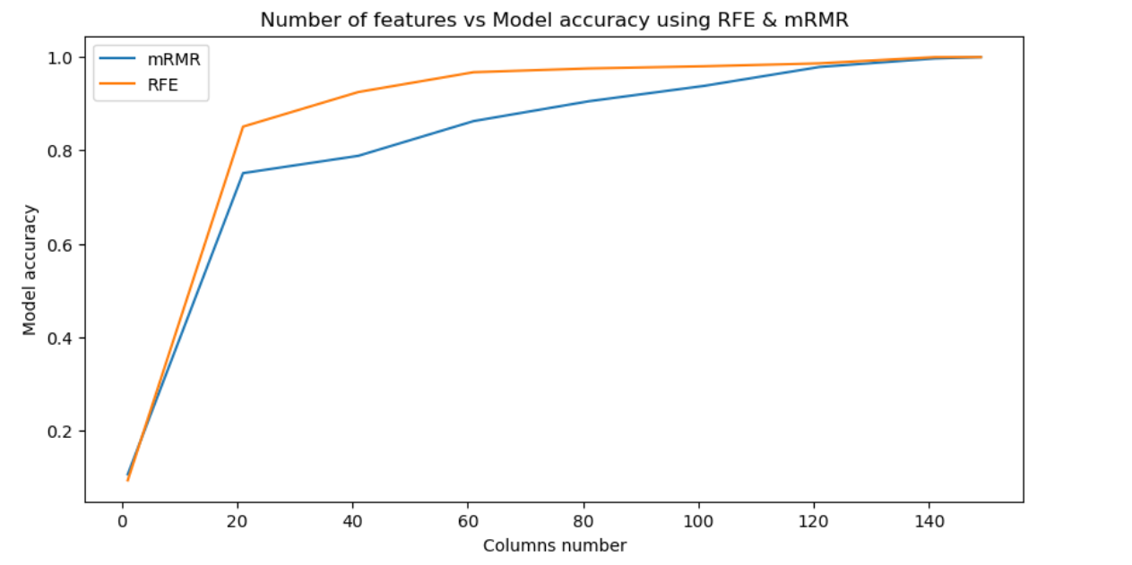

In [150]:
result;

**As a result**:

The graph shows that when ever k increased the models accuracy will also increase !

As a conclusion, all the features in our model are relevant to the data and will include all of them in our future training model.
